# Detect Faces and Blur Faces
### Complete # TODO

# Requirements

In [19]:
import cv2
import numpy as np
import os
import time
import matplotlib.pyplot as plt

# Load Models

In [20]:
# Define the path to the prototxt file using os.path.join for cross-platform compatibility
prototxt_path = os.path.join("models", "deploy.prototxt")

# Define the path to the caffemodel file using os.path.join for cross-platform compatibility
model_path = os.path.join("models", "res10_300x300_ssd_iter_140000_fp16.caffemodel")

# Load the pre-trained Caffe model from the specified files
# The readNetFromCaffe function loads the network architecture from the prototxt file and the trained weights from the caffemodel file
model = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)


# Face Detection and Blur Function

In [21]:
def face_blur(image: np.ndarray):
    # Create a copy of the input image to avoid modifying the original image (critical)
    image = image.copy() 
    # Get the height and width of the image
    h, w = image.shape[:2] 

    # Define the kernel width and height for Gaussian blurring
    # Ensure they are odd numbers by performing a bitwise OR with 1
    kernel_width = (w // 7) | 1
    kernel_height = (h // 7) | 1

    # Create a blob from the image for input to the neural network
    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))

    # Set the input for the network
    model.setInput(blob)

    # Perform forward pass to get the output detections
    output = np.squeeze(model.forward())

    # Loop over all detections
    for i in range(0, output.shape[0]):
        # Get the confidence of the detection
        confidence = output[i, 2]

        # Proceed only if the confidence is above the threshold (0.4)
        if confidence > 0.4:
            # Get the bounding box coordinates and scale them to the original image size
            box = output[i, 3:7] * np.array([w, h, w, h])
            start_x, start_y, end_x, end_y = box.astype(int)

            # Extract the face region from the image
            face = image[start_y: end_y, start_x: end_x]

            # Apply Gaussian blur to the face region
            face = cv2.GaussianBlur(face, (kernel_width, kernel_height), 0)

            # Replace the original face region with the blurred face
            image[start_y: end_y, start_x: end_x] = face

    # Return the modified image with blurred faces
    return image


# Result on Image

In [30]:
# Define the path to the image file using os.path.join for cross-platform compatibility
image_path = os.path.join("C://Users//mahya//Downloads", "Hill.jpg")

# Read the input image from the specified path
image = cv2.imread(image_path)

# Convert the image from RGB to BGR format (as OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply the face_blur function to the image to blur detected faces
image_face_blur = face_blur(image_rgb)


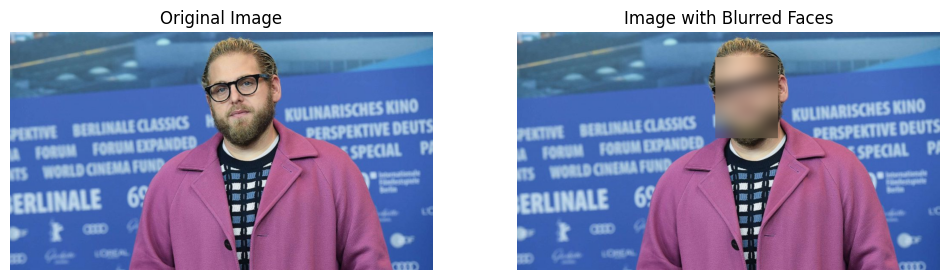

Image saved at image_face_blur.jpg


In [31]:
# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Display the original image in the first subplot
# Display the original image in the first subplot
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the image with blurred faces in the second subplot
plt.subplot(1, 2, 2)
plt.imshow(image_face_blur)
plt.title('Image with Blurred Faces')
plt.axis('off')
plt.show()


output_path = "image_face_blur.jpg" 
image_face_blur = cv2.cvtColor(image_face_blur, cv2.COLOR_BGR2RGB)
cv2.imwrite(output_path, image_face_blur)
print(f"Image saved at {output_path}")


# Result on WebCam Video Stream

In [17]:
def visualize_fps(image, fps: int):
    # Check if the image is grayscale or colored.
    # If it's grayscale, set the text color to white; if colored, set the text color to green.
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)  # White color for grayscale images.
    else:
        text_color = (0, 255, 0)  # Green color for colored images.

    # Define the row size for the text placement.
    row_size = 20 
    # Define the left margin for the text placement.
    left_margin = 24 

    # Set the font size and thickness for the text.
    font_size = 1
    font_thickness = 2

    # Format the FPS value into a string for displaying.
    fps_text = "FPS = {:.1f}".format(fps)
    # Set the text location on the image.
    text_location = (left_margin, row_size)
    
    # Place the FPS text on the image.
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )

    # Return the modified image with the FPS text.
    return image


In [15]:
# Constants for camera settings
CAMERA_DEVICE_ID = 0  # ID for the camera device
IMAGE_WIDTH = 800  # Width of the captured image
IMAGE_HEIGHT = 600  # Height of the captured image
fps = 0  # Initial Frames Per Second (FPS) value

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)  # Initialize video capture with the specified camera device ID

        while True:  # Infinite loop to continuously capture frames
            start_time = cv2.getTickCount()  # Record the start time to calculate FPS

            _, frame = cap.read()  # Capture a single frame from the camera

            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  # Resize the frame to the specified dimensions

            frame = face_blur(frame)  

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps)) 

            end_time = cv2.getTickCount()  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = (end_time - start_time) / cv2.getTickFrequency()
            # Calculate FPS based on the time taken to process the frame
            fps = 1 / seconds if seconds > 0 else 0

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:  
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the camera resource


name 'visualize_fps' is not defined


In [33]:
import cv2
import os
import time

# Define the path to the video file using os.path.join for cross-platform compatibility
CAMERA_DEVICE_ID = os.path.join("C://Users//mahya//Downloads", "Jobs_2.mp4")

# Constants for video settings
IMAGE_WIDTH = 1000  # Width of the displayed image
IMAGE_HEIGHT = 600  # Height of the displayed image
fps = 0  # Initial Frames Per Second (FPS) value
FRAME_RATE = 30  # Desired frame rate
DURATION = 1 / FRAME_RATE  # Duration of each frame


if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        # Open the input video
        cap = cv2.VideoCapture("C://Users//mahya//Downloads//Jobs_2.mp4")

        if not cap.isOpened():  # Check if the video was successfully opened
            print("Error: Unable to open the video file.")
            exit()

        # Get the frame rate and dimensions of the input video
        input_fps = int(cap.get(cv2.CAP_PROP_FPS))
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        # Output video path and writer initialization
        output_video_path = os.path.join("C://Users//mahya//Downloads", "Processed_Jobs.mp4")
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 files
        out = cv2.VideoWriter(output_video_path, fourcc, FRAME_RATE, (IMAGE_WIDTH, IMAGE_HEIGHT))

        if not out.isOpened():  # Check if the VideoWriter was successfully initialized
            print("Error: Unable to initialize the output video writer.")
            exit()

        while True:  # Infinite loop to continuously capture frames
            start_time = time.time()  # Record the start time to calculate FPS

            ret, frame = cap.read()  # Capture a single frame from the video
            if not ret:  # If there is no frame, end the loop
                break

            # Resize the frame to the specified dimensions
            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))

            # Apply the face_blur function to the frame
            frame = face_blur(frame)

            end_time = time.time()  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time - start_time

            if seconds < DURATION:  # If the processing time is less than the desired frame duration, wait for the remaining time
                time.sleep(DURATION - seconds)

            seconds = time.time() - start_time  # Recalculate the time including sleep time
            fps = 1 / seconds if seconds > 0 else 0  # Calculate FPS based on the time taken to process the frame

            # Write the processed frame to the output video
            out.write(frame)

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps))

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the video capture resource
        out.release()  # Release the video writer resource

        print(f"Processed video saved at {output_video_path}")


Processed video saved at C://Users//mahya//Downloads\Processed_Jobs.mp4
